<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_5_Cross_Validation%2C_Bias_and_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

## moons

In [0]:
from sklearn.datasets import make_moons as make_datatype
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# random_state = np.random.RandomState(0)
random_state = 0

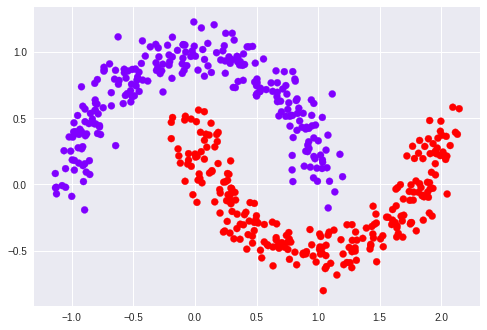

In [3]:
X, y = make_datatype(n_samples=500, noise=0.1,
                     random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [15]:
# {y_val for y_val in y}
# {y}    Doesn't work - unhashable type
set(y)

{0, 1}

# Apply Classifier

## fit and predict

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state)

In [8]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
y_test[: 5]

array([0, 0, 0, 0, 1])

In [26]:
# y_pred_proba[: 5].sum(axis=1)    # = 1
y_pred_proba[: 5, 1]

array([0.08758747, 0.03356248, 0.10559901, 0.03901789, 0.93058419])

## plot

In [0]:
import matplotlib.pyplot as plt

In [77]:
# make mesh
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 0].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx.shape, xx

((149, 195), array([[-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        ...,
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615]]))

In [78]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
Z.shape, Z

((149, 195), array([[9.92791111e-01, 9.92955210e-01, 9.93115599e-01, ...,
         9.99915444e-01, 9.99917382e-01, 9.99919276e-01],
        [9.92144644e-01, 9.92323344e-01, 9.92498010e-01, ...,
         9.99907802e-01, 9.99909916e-01, 9.99911981e-01],
        [9.91440704e-01, 9.91635283e-01, 9.91825475e-01, ...,
         9.99899470e-01, 9.99901774e-01, 9.99904026e-01],
        ...,
        [4.48797103e-04, 4.59322270e-04, 4.70094157e-04, ...,
         3.71232234e-02, 3.79611708e-02, 3.88172699e-02],
        [4.11609850e-04, 4.21263272e-04, 4.31142996e-04, ...,
         3.41510253e-02, 3.49243175e-02, 3.57144721e-02],
        [3.77502764e-04, 3.86356586e-04, 3.95417981e-04, ...,
         3.14090281e-02, 3.21222973e-02, 3.28512148e-02]]))

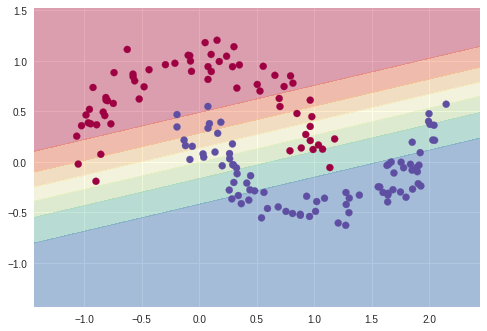

In [93]:
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)